### Gemstone Price Predictor
##### In this project we shall predict the price of the gemstone based on the independent features using regression techniques.
The dataset consists of 10 independent variables:
- id: unique identifier of each diamond.
- carat: Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
- cut: Quality of Diamond Cut.
- color: Color of Diamond.
- clarity: Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
- depth: The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface).
- table: A diamond's table is the facet which can be seen when the stone is viewed face up.
- x: Diamond X dimension.
- y: Diamond Y dimension.
- z: Diamond Z dimension.

Target Variable:
- price: price of the given diamond.



#### Importing the Data and the Required Libraries:

In [1]:
# importing libraries:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the data:

gem = pd.read_csv('data/gemstone.csv')

In [4]:
# Checking the first and the last few rows of the dataset:

gem.head(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
5,5,1.51,Very Good,J,SI1,62.8,58.0,7.34,7.29,4.59,7506
6,6,0.74,Ideal,E,VS2,61.8,57.0,5.76,5.79,3.57,3229
7,7,1.34,Premium,G,SI2,62.5,57.0,7.00,7.05,4.38,6224
8,8,0.30,Ideal,F,IF,62.0,56.0,4.35,4.37,2.70,886
9,9,0.30,Good,J,VS1,63.6,57.0,4.26,4.28,2.72,421


In [5]:
gem.tail(10)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193563,193563,0.28,Very Good,E,SI1,61.2,55.0,4.23,4.26,2.60,484
193564,193564,0.90,Good,D,SI1,63.2,57.0,6.11,6.14,3.88,4919
193565,193565,0.31,Premium,D,SI1,62.6,58.0,4.32,4.29,2.69,732
193566,193566,1.05,Ideal,G,VS1,62.1,56.0,6.54,6.51,4.06,7397
193567,193567,0.58,Ideal,E,VS2,61.8,57.0,5.33,5.36,3.31,1872
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [7]:
# checking the shape of the dataset:

gem.shape

(193573, 11)

#### Performing various checks on data:

- types of data in the dataset.
- checking missing values.
- checking duplicate values.
- checking dataset stats.
- checking unique values.

In [8]:
# dataset info:

gem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [9]:
# checking for null values:

gem.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [10]:
# checking for duplicate values:

gem.duplicated().sum()

0

In [11]:
# checking the unique values:

gem.nunique()

id         193573
carat         248
cut             5
color           7
clarity         8
depth         153
table         108
x             522
y             521
z             349
price        8738
dtype: int64

In [12]:
# checking the stats:

gem.describe()

,id,carat,depth,table,x,y,z,price
count,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000,193573.000000
mean,96786.000000,0.790688,61.820574,57.227675,5.715312,5.720094,3.534246,3969.155414
std,55879.856166,0.462688,1.081704,1.918844,1.109422,1.102333,0.688922,4034.374138
min,0.000000,0.200000,52.100000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,48393.000000,0.400000,61.300000,56.000000,4.700000,4.710000,2.900000,951.000000
50%,96786.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,2401.000000
75%,145179.000000,1.030000,62.400000,58.000000,6.510000,6.510000,4.030000,5408.000000
max,193572.000000,3.500000,71.600000,79.000000,9.650000,10.010000,31.300000,18818.000000


#### Observations:

- The dataset is a mix of numeric and categorical variables.
- The dataset has 11 columns and approximately 200000 rows.
- There are no missing values and neither are there any duplicate rows in the dataset.
- Diamonds of various shapes and sizes are available.

#### Separating the numeric and categrical features and observing them further:

In [13]:
# define numerical & categorical columns
numeric_features = [feature for feature in gem.columns if gem[feature].dtype != 'O']
categorical_features = [feature for feature in gem.columns if gem[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price']

We have 3 categorical features : ['cut', 'color', 'clarity']


In [14]:
# dropping the id feature:

gem = gem.drop(columns='id',axis=1)
gem.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

### Data Visualization:

In this part we shall perform Univariate Analysis on the Numeric as well as categorical Features.

#### Univariate Analysis:

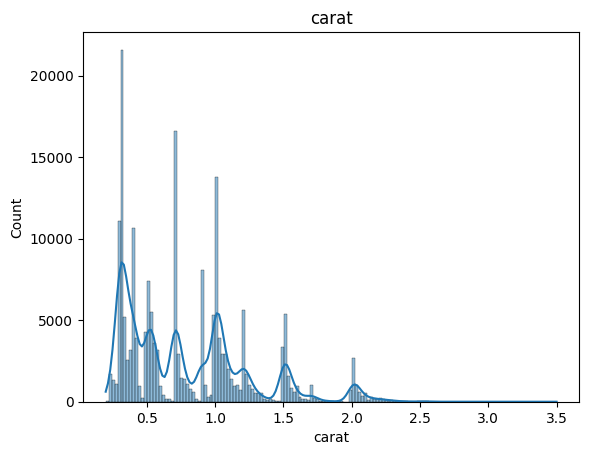

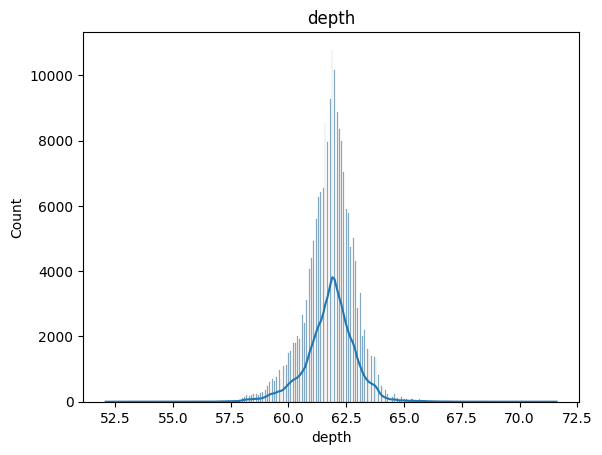

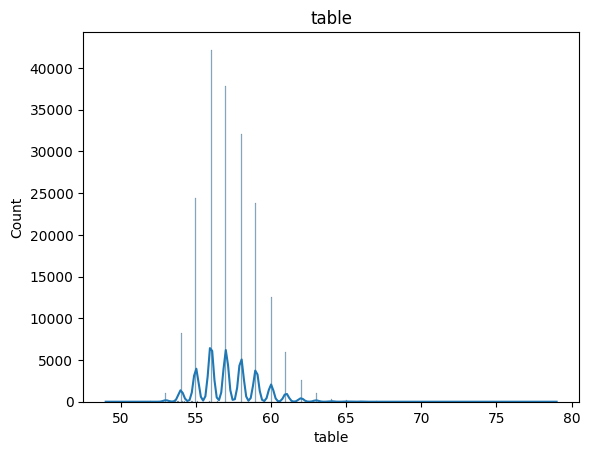

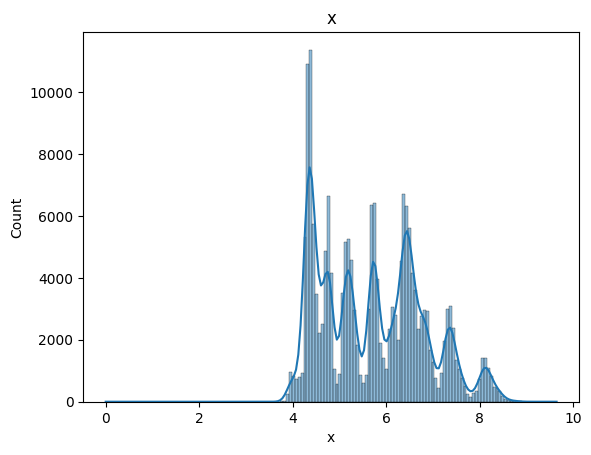

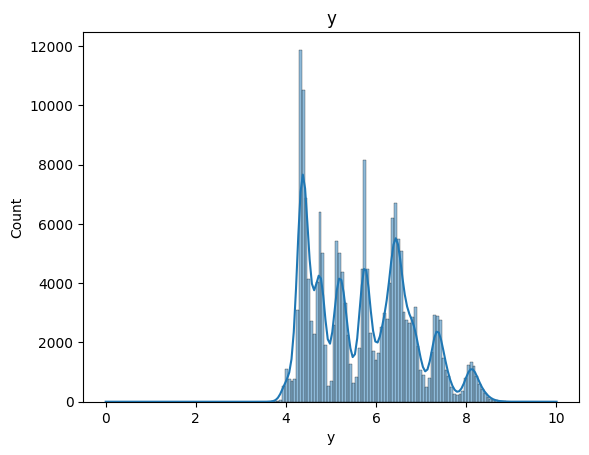

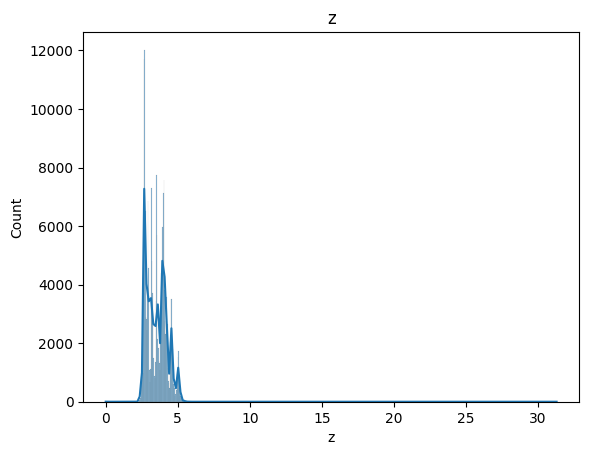

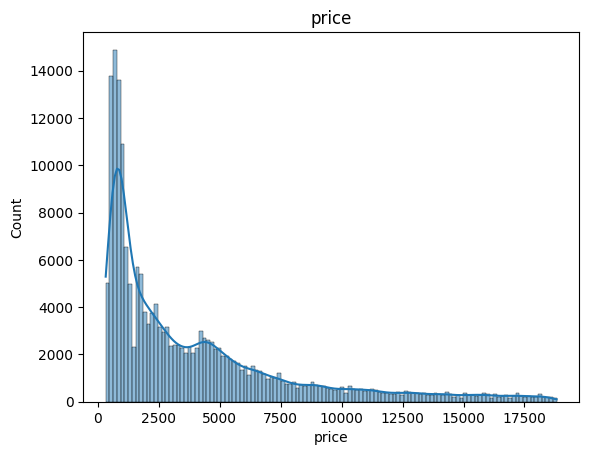

In [20]:
# Univariate Analysis on the Numeric features:

for col in numeric_features:
    if col!= 'id':
        sns.histplot(data = gem, x = col, kde=True)
        plt.title(col)
        print('\n')
        plt.show()

#### Observation:

- The carat range varies between 0.25 and 3.5, a large quantity of diamonds are available around 0.25/0.3 carat size, as the 
  carat size increases, the diamond size reduces.
- The average diamond depth size is between 61 and 62, while the max and min range is 52 and 72.
- The avg table size is 56, while the minimum is below 50 and maximum is just below 80.
- The X and Y dimensions range between 0 and 10, while the Z dimension is between 0 and 30.
- The price of diamond varies beyween 500 to more than 17500 dollars, while max diamonds cost around 1000 dollars.

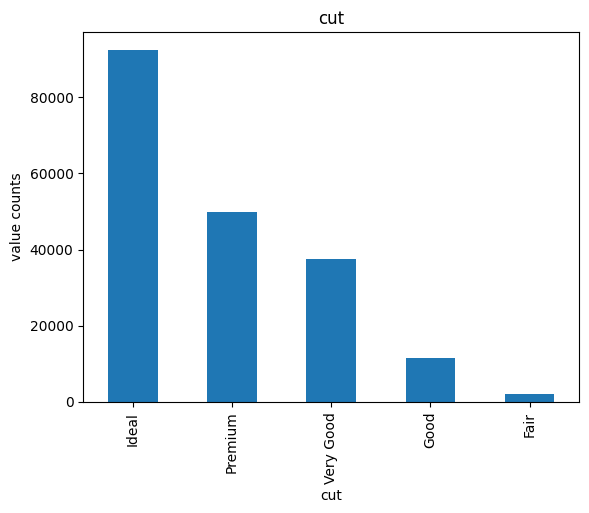

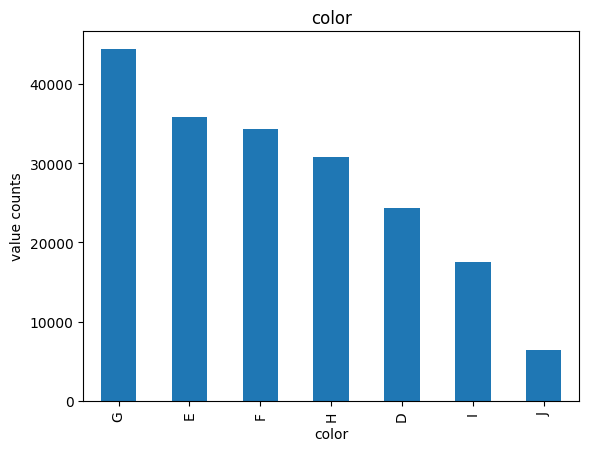

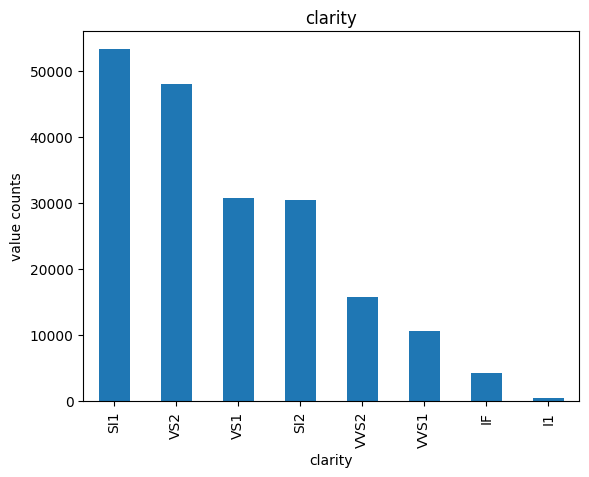

In [21]:
# Univariate Analysis on the Numeric features:

for col in categorical_features:
    gem[col].value_counts().plot(kind='bar', xlabel = col , ylabel='value counts', title = col)
    #plt.title(col)
    print('\n')
    plt.show()

#### Observations:

- The number of diamonds with fair cut is least and their number increases gradually upto ideal cut.
- J is the color for the least number of diamonds, while G, is for maximum number of diamonds, I,D,H,F,E are the diamond colors with small increment in numbers respectively.
- SI1 are the maximum number of diamonds with the clarity type and their number reduces upto I1 clarity type.

#### Multivariate Analysis:

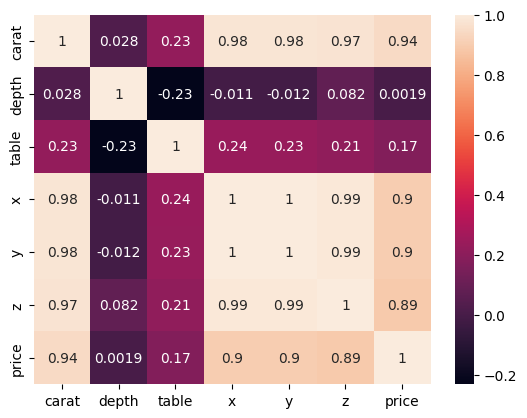

In [22]:
# Correlation Heatmap:

sns.heatmap(gem.corr(numeric_only=True),annot=True)
plt.show()

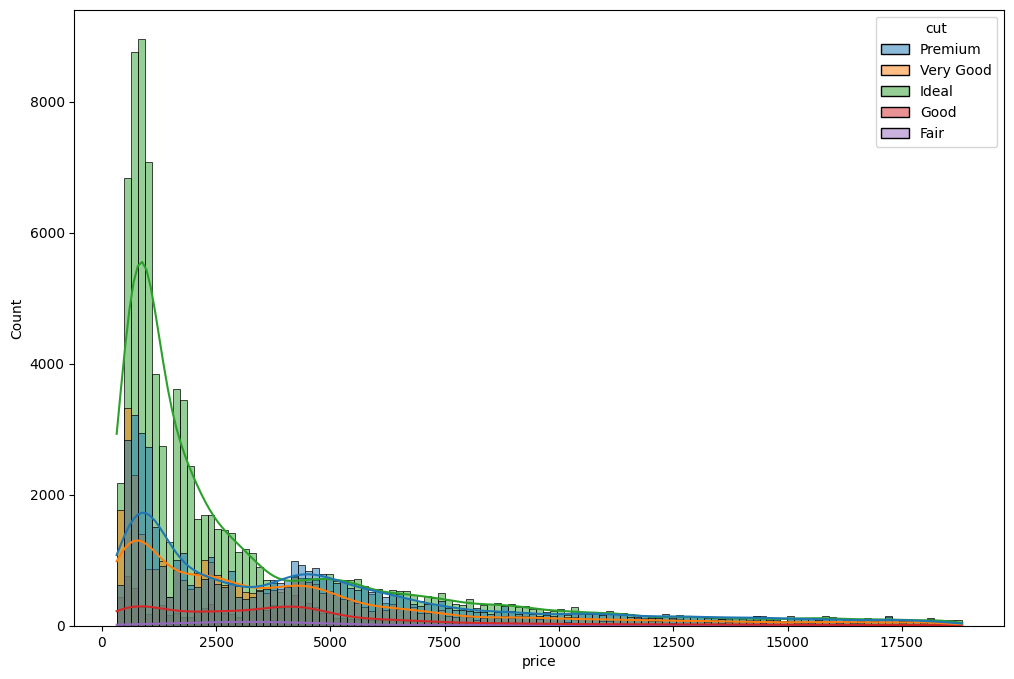

In [24]:
# Checking whether different categories of the categorical variables affect the price of the diamonds.
plt.figure(figsize=(12,8))
sns.histplot(data=gem,x='price',kde=True,hue='cut')
plt.show()

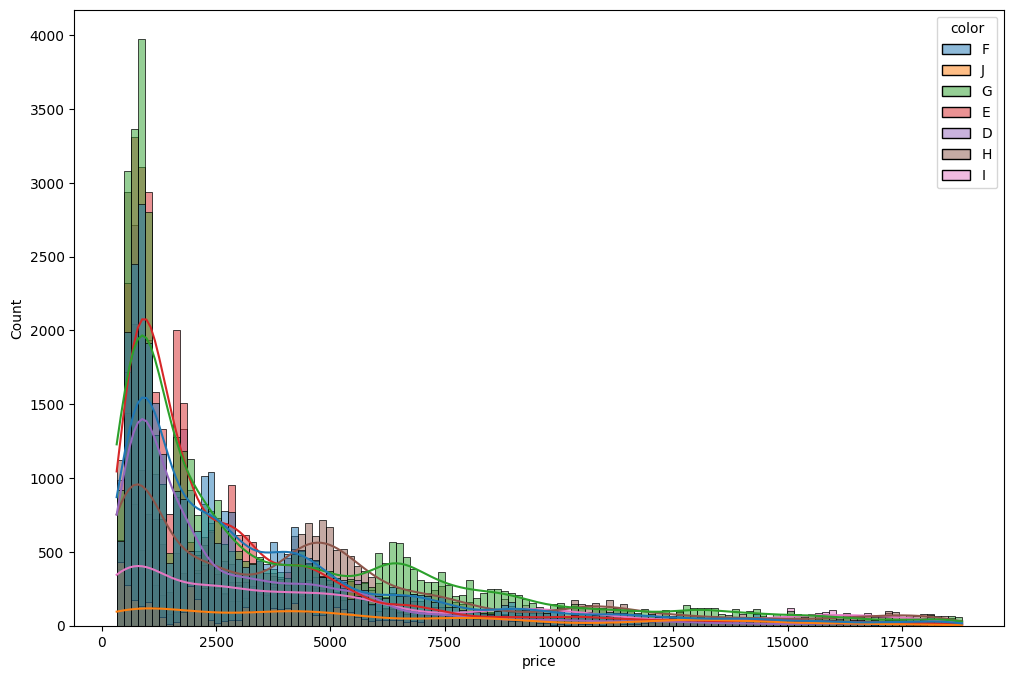

In [25]:
plt.figure(figsize=(12,8))
sns.histplot(data=gem,x='price',kde=True,hue='color')
plt.show()

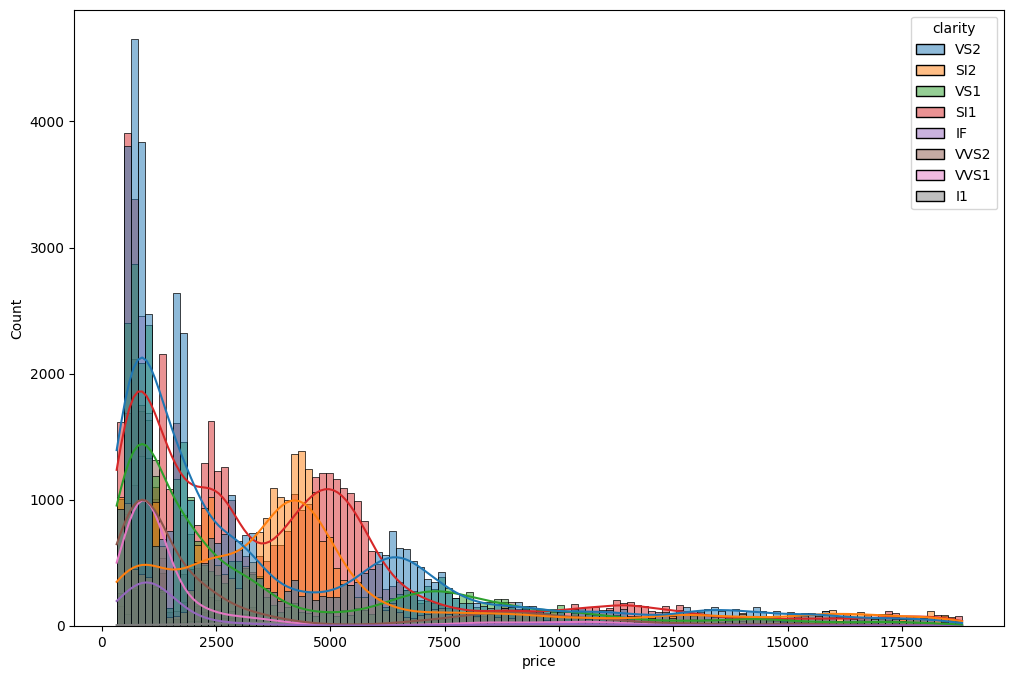

In [26]:
plt.figure(figsize=(12,8))
sns.histplot(data=gem,x='price',kde=True,hue='clarity')
plt.show()

#### Observations:

- The carat, X,Y,Z variables are highly correlated with the price variable.
- For the cut variable, the avg price does not differ much across its categories.
- For the different colors, the avg price does not differ much accross the categories.
- As far as the diamond clarity is concerned, the avg price may vary accross some categories.

#### We can say that, 'carat', 'X', 'Y' and 'Z' variables affect the 'price' of the diamond the most, based on our simple analysis.